最近在学mysql数据查询，感觉mysql的查询数据功能很不错，在这里记录了本人的一次mysql电商数据分析过程。

所有表格数据，一共9张，分别是商品品牌表，商品颜色表，商品信息表，商品尺寸表，订单细节表，订单信息表，区域信息表，用户地址表，用户信息表。另外有一张E-R图以及结构信息表。

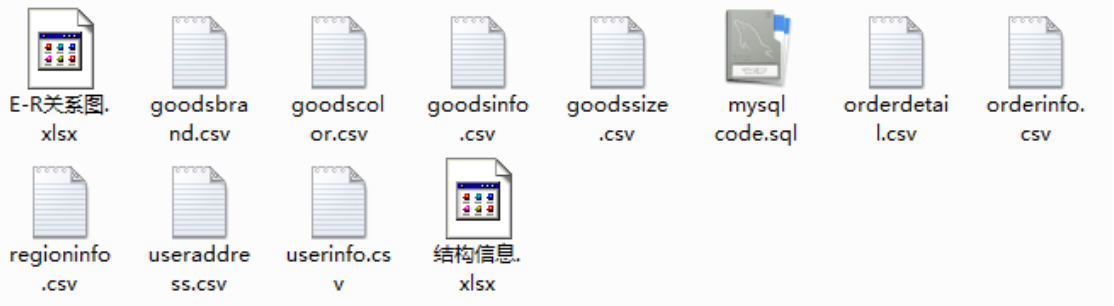

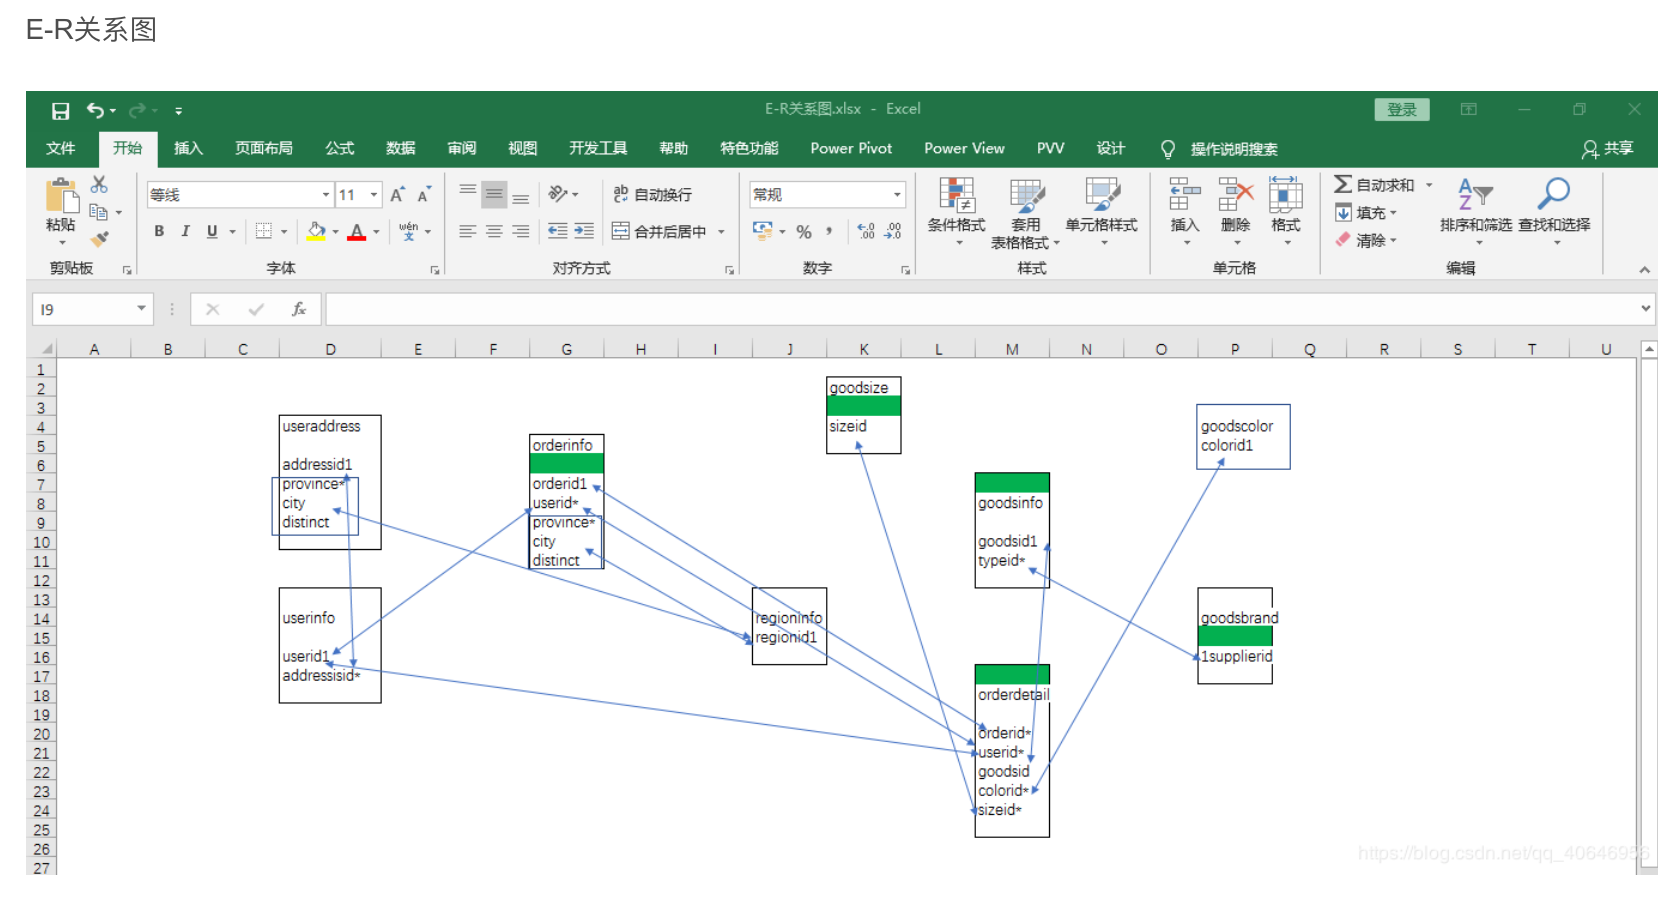

## 一、创建数据库

In [ ]:
create database ds;
use ds;

## 二、数据创建表，且导入数据。

In [ ]:
#-------------建表导数------------------

create table userinfo(
userid varchar(6) not null default "-",
username varchar(20) not null default "-",
userpassword varchar(100) not null default "-",
sex int not null default 0,
usermoney int not null default 0,
frozemoney int not null default 0,
addressid varchar(20) not null default "-",
regtime varchar(20) not null default "-",
lastlogin varchar(20) not null default "-",
lasttime date not null 

);

load data local infile "C:/Users/Administrator/Desktop/mysql sample/userinfo.csv"
into table userinfo
fields terminated  by ","
ignore 1 lines;
select * from userinfo;
select count(*) from userinfo;
desc userinfo;

alter table userinfo add regtime_ datetime not null;
update userinfo set regtime_ =from_unixtime(regtime);


alter table userinfo add lastlogin_ datetime not null;
update userinfo set lastlogin_ = from_unixtime(lastlogin);


alter table userinfo DROP column regtime ;
alter table userinfo DROP column lastlogin ;
desc userinfo;


#----------------regioninfo--------------------------------


create table regioninfo(
regionid varchar(4) not null default "-",
parentid varchar(4) not null default "-",
regionname varchar(20) not null default "-",
regiontype int not null default 0,
agencyid int not null default 0,
pt varchar(9) null default "-"

);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/regioninfo.csv"
into table regioninfo
fields terminated  by ","
ignore 1 lines;

select * from  regioninfo;

update regioninfo set pt =substring(pt,1,8);


#----------------useraddress--------------------------------



create table useraddress(
addressid varchar(5) not null default "-",
userid varchar(6) not null default "-",
consignee varchar(50) not null default "-",
country varchar(1) not null default "-",
province varchar(2) not null default "-",
city varchar(4) not null default "-",
district varchar(4) not null default "-",
address varchar(200) not null default "-",
pt varchar(10) not null default "-"
);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/useraddress.csv"
into table useraddress
fields terminated  by ","
ignore 1 lines;



update useraddress set pt =substring(pt,1,8);

alter table useraddress add pt_ datetime not null;
update useraddress set pt_ = date_format(pt,"%y-%m-%d");

alter table useraddress drop column pt;

select * from  useraddress;
select count(*) from  useraddress;




#----------------goodsinfo--------------------------------



create table goodsinfo(
goodsid varchar(10) not null default "-",
typeid varchar(6) not null default "-",
markid varchar(50) not null default "-",
goodstag varchar(1) not null default "-",
brandtag varchar(2) not null default "-",
customtag varchar(4) not null default "-",
goodsname varchar(4) not null default "-",
clickcount int not null default 0,
clicker int not null default 0,

goodsnumber int not null default 0,
goodsweight int not null default 0,
markprice double not null default 0,
shopprice double not null default 0,
addtime varchar(20) not null default 0,
isonsale int not null default 0,
sales int not null default 0,
realsales int not null default 0,
extraprice double not null default 0,

goodsno varchar(9) not null default 0,
pt varchar(9) not null default 0

);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/goodsinfo.csv"
into table goodsinfo
fields terminated  by ","
ignore 1 lines;

select * from  goodsinfo;

alter table goodsinfo add addtime_ datetime not null;
update goodsinfo set addtime_ = from_unixtime(addtime);

alter table goodsinfo drop column addtime;


update goodsinfo  set pt =substring(pt,1,8);


alter table  goodsinfo add pt_ datetime not null;
update goodsinfo set pt_ = date_format(pt,"%y-%y-%d");
alter table goodsinfo drop column pt;


#----------------goodsbrand--------------------------------



create table goodsbrand(
supplierid varchar(4) not null default "-",
brandtype varchar(100) not null default "-",
pt varchar(9) not null default "-"

);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/goodsbrand.csv"
into table goodsbrand
fields terminated  by ","
ignore 1 lines;

select * from  goodsbrand;

update goodsbrand set pt = substring(pt,1,8);

alter table  goodsbrand add pt_ datetime not null;

update goodsbrand set pt_ = date_format(pt,"%y-%m-%d");
alter table goodsbrand drop column pt;



#----------------goodscolor--------------------------------



create table goodscolor(
colorid varchar(4) not null default "-",
colornote varchar(100) not null default "-",
colorsort varchar(9) not null default 0,
pt varchar(9) not null default "-"
);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/goodscolor.csv"
into table goodscolor
fields terminated  by ","
ignore 1 lines;

select * from goodscolor;

update goodscolor set pt = substring(pt,1,8);

alter table goodscolor add pt_ datetime not null;

update goodscolor  set pt_ = date_format(pt,"%y-%m-%d");
alter table goodscolor  drop column pt;



#----------------goodsize--------------------------------



create table goodsize(
sizeid varchar(4) not null default "-",
sizenote varchar(100) not null default "-",
sizesort int not null default 0,
pt varchar(9) not null default "-"
);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/goodssize.csv"
into table goodsize
fields terminated  by ","
ignore 1 lines;


select * from goodsize;

update goodsize set pt = substring(pt,1,8);

alter table goodsize add pt_ datetime not null;

update goodsize  set pt_ = date_format(pt,"%y-%m-%d");
alter table goodsize  drop column pt;

#----------------orderinfo--------------------------------



create table orderinfo(
orderid varchar(6) not null default "-",
userid varchar(10) not null default "-",
orderstate int not null default 0,
paystate int not null default 0,

allotstatus int not null default 0,
consignee varchar(100) not null default "-",
country int not null default 0,
province int not null default 0,

city int not null default 0,
city1 varchar(40) not null default "-",
district int not null default 0,
address varchar(100) not null default 0,
goodsamount double not null default 0,

orderamount double not null default 0,
shippingfree int not null default 0,
realshippingfree int not null default 0,
paytool  int not null default 0,
isbalancepay int not null default 0,

balancepay double not null default 0,
otherpay double not null default 0,
paytime varchar(20) not null default 0,
addtime varchar(20) not null default 0


);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/orderinfo.csv"
into table orderinfo
fields terminated  by ","
ignore 1 lines;

select * from orderinfo;

alter table orderinfo add paytime_ datetime not null;
update orderinfo set paytime_ = from_unixtime(paytime);


alter table orderinfo add addtime_ datetime not null;
update orderinfo set addtime_ = from_unixtime(addtime);


alter table orderinfo  drop column paytime;
alter table orderinfo  drop column addtime;



#----------------orderdetail--------------------------------



create table orderdetail(
recid varchar(7) not null default "-",
orderid varchar(6) not null default "-",
userid varchar(6) not null default  "-",
specialid varchar(6) not null default "-",

goodsid varchar(6) not null default "-",
goodsprice double not null default 0,
colorid varchar(4) not null default  "-",
sizeid varchar(4) not null default "-",

amount int not null default 0

);

#导入数据

load data local infile "C:/Users/Administrator/Desktop/mysql sample/orderdetail.csv"
into table  orderdetail
fields terminated  by ","
ignore 1 lines;

select * from orderdetail;
select count(*) from orderdetail;

## 三、此案例查询要得出以下7个问题的答案：

### 1,求出购买产品金额最多的前十名顾客

In [ ]:
Select sum(orderamount) ,username 
From orderinfo a
left join userinfo b
on a.userid=b.userid
group by b.userid
order by sum(orderamount) desc
limit 10;

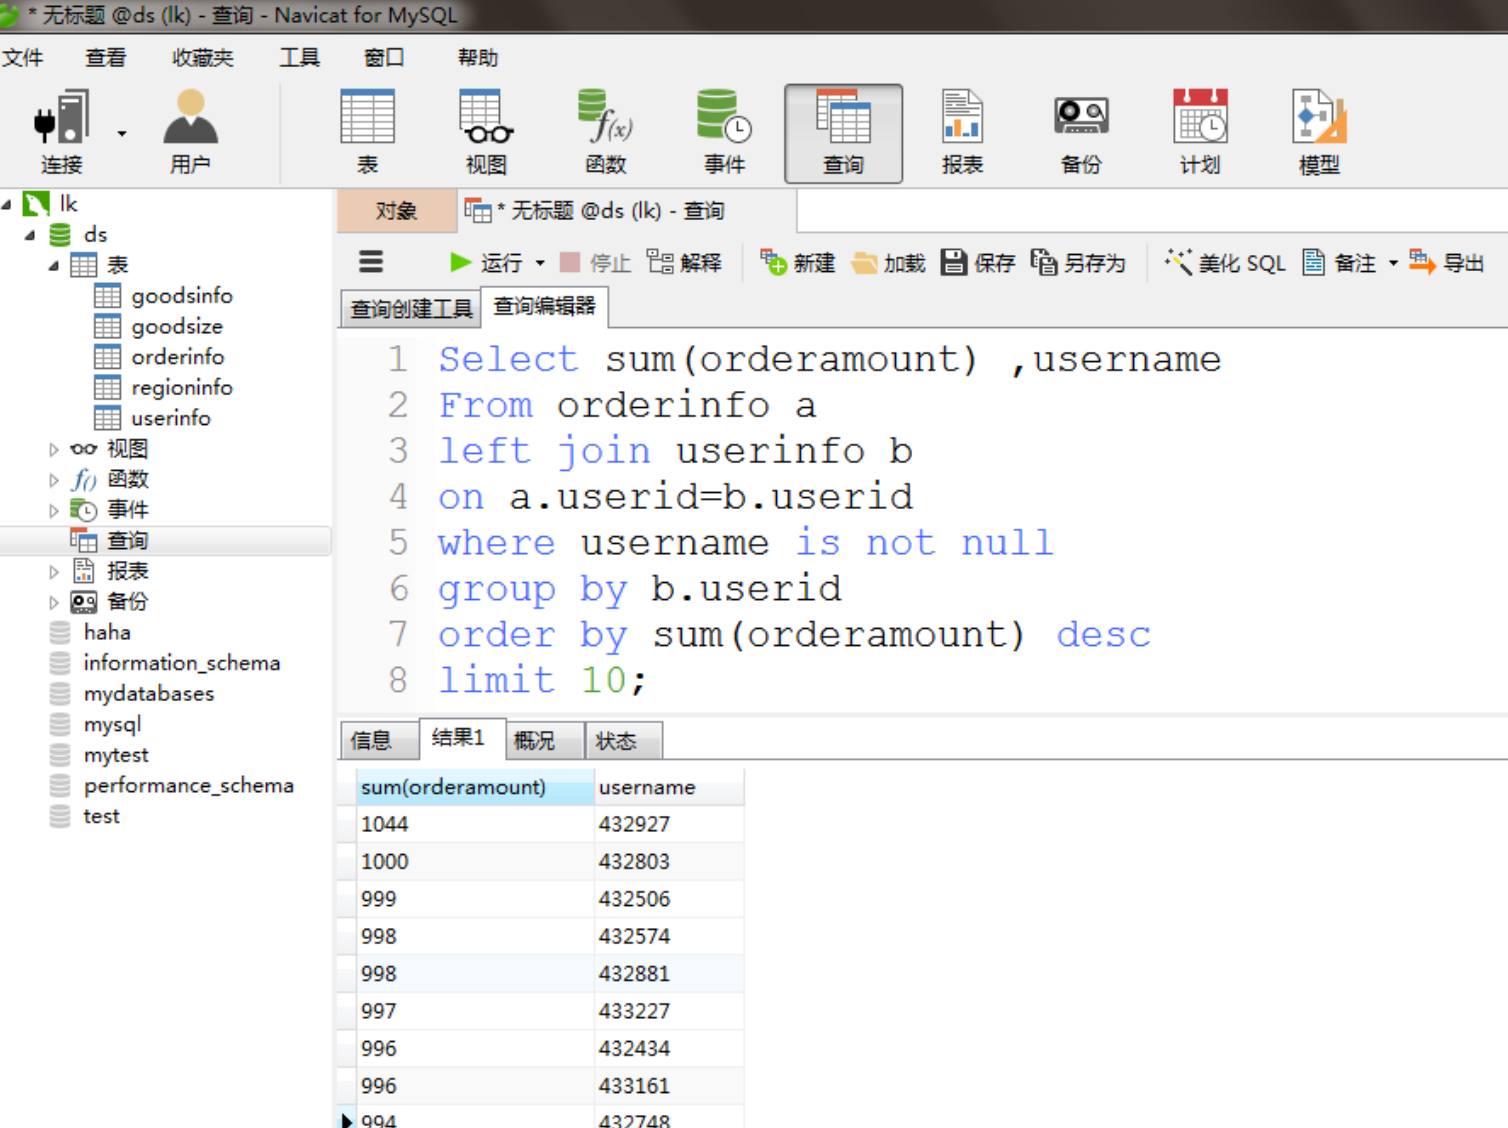

### 2,求出购买产品金额最多的前十名顾客的最后登录时间

In [ ]:
Select lastlogin,username,sum(orderamount)
From orderinfo a
left join userinfo b
on a.userid=b.userid
group by b.userid
order by sum(orderamount) desc
limit 10;

### 3,求出购买产品金额最多的前十名顾客的所在城市

In [ ]:
Select sum(orderamount),city,username
From orderinfo a
Left join userinfo b
a.userid=b.userid
group by a.userid
order by sum(orderamount)
limit 10;

### 4,求出购买力最强的前十个城市

In [ ]:
Select city1 ,sum(orderamount)
From  orderinfo
Group by city1
Order by sum(orderamount) desc
limit 10;

### 5,求出最畅销的十个品牌

In [ ]:
Select brandtype, jine
From goodsbrand
Join (
Select typeid, jine
From goodsinfo
Join (Select goodsid, jine
From orderdetail
Join (Select sum(orderamount)as jine, orderid
From orderinfo 
Group by orderid
Order by sum(orderamount) desc
Limit 10)T1
On T1. Orderid= orderdetail. Orderid)T2
On T2.goodsid= goodsinfo. goodsid
)T3
On T3.typeid=goodsbrand.supplierid
ORDER BY jine desc

### 6,求出最畅销的5种颜色以及最不畅销的5种颜色

In [ ]:
Select color1 as "最欢迎的5种颜色", color2 as "最不欢迎的5种颜色"
From (
Select DISTINCT colornote as color1
From goodscolor
Join (
Select colorid 
From orderdetail
Join (
Select sum(orderamount), orderinfo .orderid
From orderinfo
Group by orderid
Order by sum(orderamount) desc
LIMIT 5
)T1
On T1. orderid= orderdetail. orderid
)T2
on goodscolor.colorid=T2.colorid
)T3,(
Select DISTINCT colornote as color2

From goodscolor
Join (
Select colorid 
From orderdetail
Join (
Select sum(orderamount), orderinfo .orderid
From orderinfo
Group by orderid
Order by sum(orderamount) 
LIMIT 5
)T1
On T1. orderid= orderdetail. orderid
)T2
on goodscolor.colorid=T2.colorid
)T4

### 7,求出最畅销的十个商品所属品牌中各个不同尺码的销售额

In [ ]:
#### Select brandtype, jine,goodsname
From goodsbrand
Join (
Select typeid, jine,goodsname
From goodsinfo
Join (Select goodsid, jine
From orderdetail
Join (Select sum(orderamount)as jine, orderid
From orderinfo 
Group by orderid
Order by sum(orderamount) desc
Limit 10)T1
On T1. Orderid= orderdetail. Orderid)T2
On T2.goodsid= goodsinfo. goodsid
)T3
On T3.typeid=goodsbrand.supplierid
ORDER BY jine desc
